---

# Pymaceuticals Inc.
   The study aims to assess the efficacy of Capomulin in treating SCC tumors. Preliminary analysis suggests a potential            correlation between mouse weight and tumor volume. Box plots indicate variations in final tumor volumes across different drug    regimens. A correlation plot provided insights into the relationships between different variables, such as weight and tumor      volume. The value 0.84 suggests a close linear correlation suggesting the mice with larger tumors tend to be heavier.

---

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plot
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_complete = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")

# Display the data table for preview
mouse_metadata_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice.
clinical_mice = mouse_metadata_complete["Mouse ID"].nunique()
clinical_mice

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = mouse_metadata_complete[mouse_metadata_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = mouse_metadata_complete[mouse_metadata_complete['Mouse ID'] == 'g989']
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_metadata_complete[mouse_metadata_complete['Mouse ID'] != 'g989']

In [25]:
# Checking the number of mice in the clean DataFrame.
starter_mice = clean_df["Mouse ID"].nunique()
starter_mice

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Using the aggregation method, produce the same summary statistics in a single line
summarystats = pd.DataFrame({
                             "Mean Tumor Volume": mean, 
                             "Median Tumor Volume": median, 
                             "Tumor Volume Variance": variance, 
                             "Tumor Volume Std. Dev.": std_dev,
                             "Tumor Volume Std. Err.": sem
                        })

summarystats 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summarystats_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(
    columns={
        'mean': 'mean',
        'median': 'median',
        'var': 'var',
        'std': 'std',
        'sem': 'sem'
    }
)

summarystats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

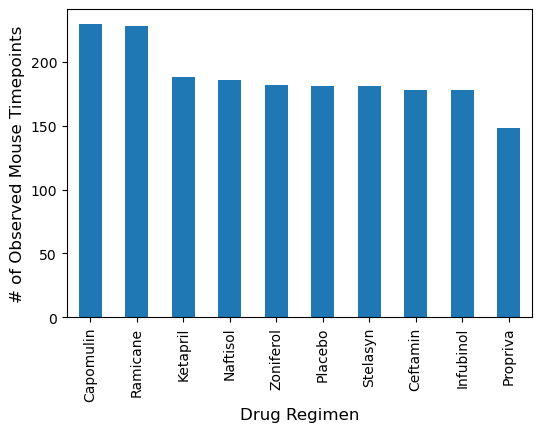

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_treatment = clean_df.groupby(['Drug Regimen'])['Mouse ID'].count() 
mice_treatment.sort_values(ascending = False).plot(kind ="bar", figsize = (6,4))
plt.xlabel("Drug Regimen",fontsize=12)
plt.ylabel("# of Observed Mouse Timepoints",fontsize=12)
plt.show()

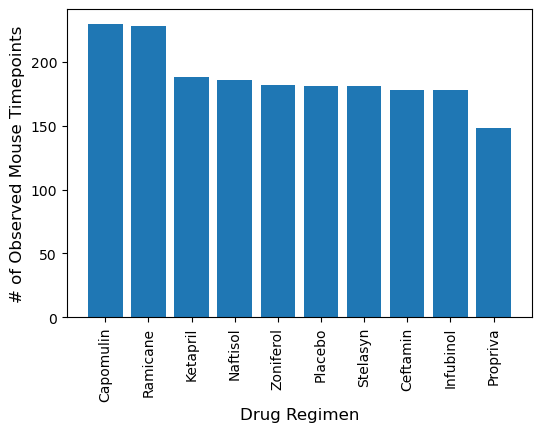

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a bar plot using pyplot
plt.figure(figsize=(6, 4))
sort_data =  mice_treatment.sort_values(ascending=False)
plt.bar(sort_data.index, sort_data)
plt.xlabel("Drug Regimen",fontsize=12)
plt.ylabel("# of Observed Mouse Timepoints",fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Text(0, 0.5, 'Sex')

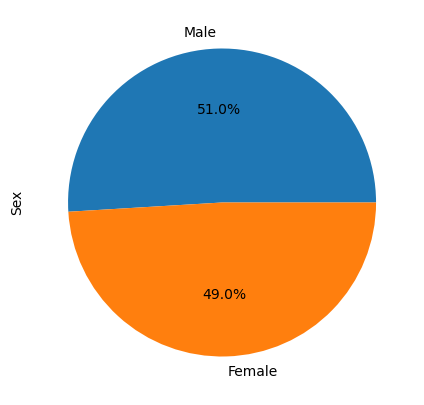

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist_pandas =  clean_df['Sex'].value_counts()
ax = sex_dist_pandas.plot.pie(startangle=0,autopct='%1.1f%%', figsize=(5, 5), fontsize=10)
ax.set_ylabel('Sex')

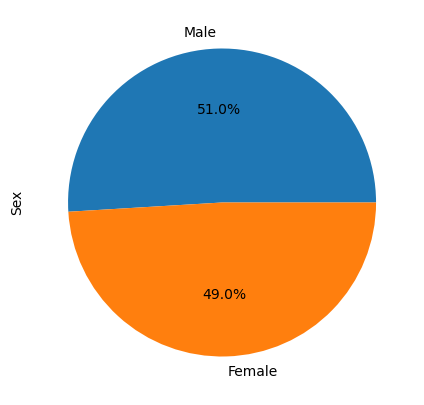

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist_pyplot = clean_df['Sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sex_dist_pyplot, labels=sex_dist_pyplot.index, autopct='%1.1f%%', textprops={'fontsize': 10},startangle=0) 
plt.ylabel("Sex",fontsize=10)
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
last_tp_df = pd.DataFrame(last_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
grouped_df = pd.merge(clean_df, last_tp_df, on=('Mouse ID', 'Timepoint'), how='right')
grouped_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [33]:
# Put treatments into a list for the for loop (and later for plot labels)
list_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in list_treatments:
    subset = grouped_df.loc[grouped_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    vol_data.append(subset)

    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    iqr = upper_quartiles - lower_quartiles

    lower_bound = lower_quartiles - 1.5 * iqr
    upper_bound = upper_quartiles + 1.5 * iqr

    # Identify potential outliers
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{treatment} Potential outliers: {outliers}")

Capomulin Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


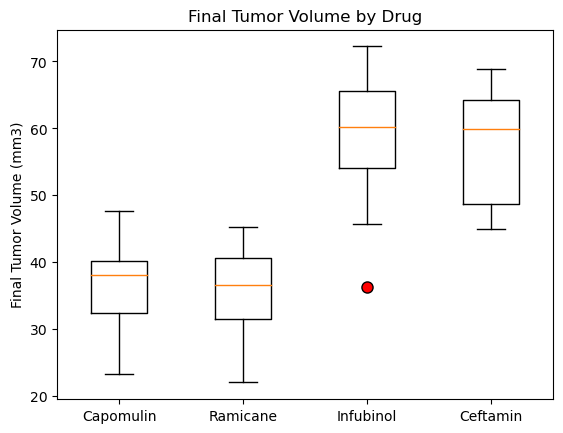

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
props_flier = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(vol_data, flierprops=props_flier)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

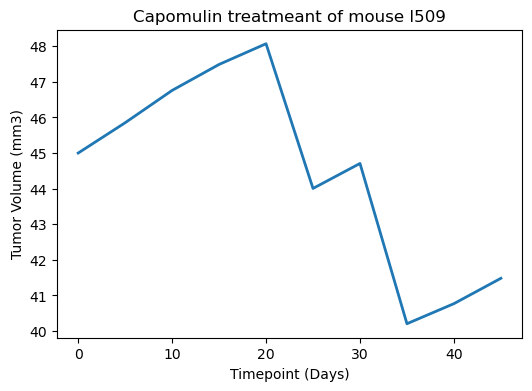

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_plot_df
x_axis_TP = line_plot_df["Timepoint"] 
tumor_size = line_plot_df["Tumor Volume (mm3)"] 
plt.figure(figsize=(6, 4))
plt.title('Capomulin treatmeant of mouse l509') 
plt.plot(x_axis_TP, tumor_size,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()

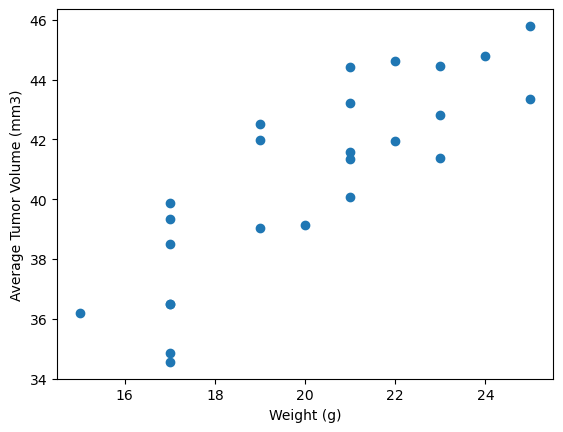

In [78]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

middle_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

middle_vol_df = pd.merge(capomulin_df, middle_vol_df, on='Mouse ID')
final_avg_vol_df = middle_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


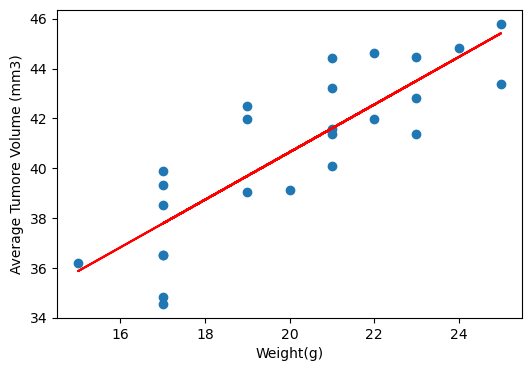

In [44]:
# Calculate the correlation coefficient and a linear regression model 
correlation=round(st.pearsonr(x,y)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
model=st.linregress(x,y)
model

slope = 0.9544396890241045
intercept = 21.552160532685015

line = slope*(x) + intercept

plt.figure(figsize=(6, 4))
plt.scatter(x,y)
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.savefig('linearregression')
plt.show()
